In [2]:
from functools import partial

import numpy as np
import pytensor.tensor as pt

import pymc as pm

import graphviz

In [3]:
with pm.Model() as pmodel:
    mu = pm.Normal("x", mu=0, shape=(3))
    sigma = pm.HalfNormal("sigma")
    y = pm.Normal("y", mu=mu, sigma=sigma)

for rv, shape in pmodel.eval_rv_shapes().items():
    print(f"{rv:>11}: shape={shape}")

          x: shape=(np.int64(3),)
sigma_log__: shape=()
      sigma: shape=()
          y: shape=(np.int64(3),)


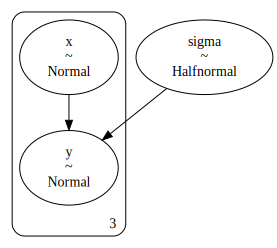

In [4]:
pm.model_to_graphviz(pmodel)

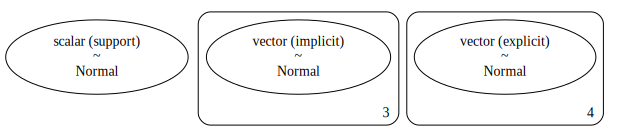

In [5]:
with pm.Model() as pmodel:
    pm.Normal("scalar (support)")
    pm.Normal("vector (implicit)", mu=[1, 2, 3])
    pm.Normal("vector (explicit)", shape=(4,))

pm.model_to_graphviz(pmodel)

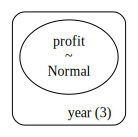

In [6]:
with pm.Model() as model:
    pm.Normal("profit", shape=(3,), dims="year")

pm.model_to_graphviz(model)

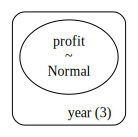

In [7]:
coords = {"year": [2020, 2021, 2022]}
with pm.Model(coords=coords) as model:
    pm.Normal("profit", dims="year")

pm.model_to_graphviz(model)

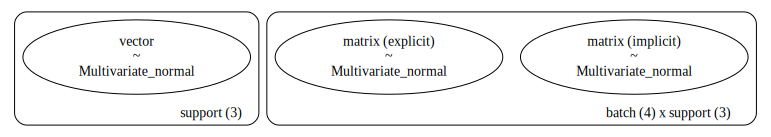

In [8]:
coords = {
    "batch": [0, 1, 2, 3],
    "support": ["A", "B", "C"],
}
with pm.Model(coords=coords) as model:
    pm.MvNormal("vector", mu=[0, 0, 0], cov=np.eye(3), dims=("support",))
    pm.MvNormal("matrix (implicit)", mu=np.zeros((4, 3)), cov=np.eye(3), dims=("batch", "support"))
    pm.MvNormal(
        "matrix (explicit)", mu=[0, 0, 0], cov=np.eye(3), shape=(4, 3), dims=("batch", "support")
    )

pm.model_to_graphviz(model)